In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#Loading the dataset
df = pd.read_csv(r"fake_news_merged_final.csv")
df.head()

,ID,label,statement,subject,speaker,speaker_job,state_info,party_affiliation,barely_true_counts,false_counts,...,fear,joy,disgust,sad,speaker_id,list,sentiment_code,full_text,emotion,digit
0,2635.json,False,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,0.008926,0.026096,0.263479,0.531887,_0_,"[0, 1]",_NEG_,abortion says the annies list political group ...,"[0.121137,0.263479,0.008926,0.026096,0.531887,...",0
1,10540.json,True,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,0.124566,0.191357,0.016999,0.102045,_1_,"[0, 1]",_NEG_,energy history job accomplishments when did th...,"[0.095352,0.016999,0.124566,0.191357,0.102045,...",1
2,324.json,True,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,...,0.024162,0.500384,0.454228,0.052453,_2_,"[1, 0]",_NEG_,foreign policy hillary clinton agrees with joh...,"[0.039559,0.454228,0.024162,0.500384,0.052453,...",1
3,1123.json,True,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,...,0.194674,0.375055,0.022509,0.383403,_3_,"[0, 1]",_NEG_,NaN,"[0.004804,0.022509,0.194674,0.375055,0.383403,...",1
4,9028.json,True,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,...,0.215996,0.222402,0.045672,0.274343,_4_,"[0, 1]",NaN,NaN,"[0.044237,0.045672,0.215996,0.222402,0.274343,...",1


In [3]:
df['full_text'] = df['full_text'].fillna('')
df['full_text'][1]

df.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3563
state_info              2746
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  129
sentiment               1717
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1717
full_text                  0
emotion                    0
digit                      0
dtype: int64

In [4]:
unique_labels = df['label'].unique()
print(unique_labels)

[False  True]


In [5]:
# # Count the number of null values in 'label' column
# null_count = df['label'].isnull().sum()

# # Calculate the number of fake and real values to assign to null values
# fake_count = df['label'].value_counts()['false']
# real_count = df['label'].value_counts()['true']

# # Randomly assign 'true' or 'false' to null values
# random_labels = np.random.choice(['true', 'false'], size=null_count, p=[real_count/(real_count+fake_count), fake_count/(real_count+fake_count)])

# # Replace the null values with the randomly assigned labels
# df.loc[df['label'].isnull(), 'label'] = random_labels

# # Verify the updated distribution of labels
# label_counts = df['label'].value_counts()
# print("Updated label distribution:\n", label_counts)


In [6]:
df.isnull().sum()

ID                         0
label                      0
statement                  0
subject                    0
speaker                    0
speaker_job             3563
state_info              2746
party_affiliation          0
barely_true_counts         0
false_counts               0
half_true_counts           0
mostly_true_counts         0
pants_on_fire_counts       0
context                  129
sentiment               1717
sentiment_score            0
sentiment_magnitude        0
anger                      0
fear                       0
joy                        0
disgust                    0
sad                        0
speaker_id                 0
list                       0
sentiment_code          1717
full_text                  0
emotion                    0
digit                      0
dtype: int64

In [91]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X = Vectorizer.fit_transform(df['full_text'])
y = df['label']

# print(X_Train)
# print(X_Test)

In [92]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [93]:
# from sklearn.decomposition import TruncatedSVD
# import numpy as np

# # Perform TruncatedSVD
# svd = TruncatedSVD(n_components=100)  # Specify the desired number of components
# X_svd = svd.fit_transform(X)

# # Plot explained variance ratio
# explained_variance_ratio = np.cumsum(svd.explained_variance_ratio_)
# plt.plot(explained_variance_ratio)
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.xlim([1, 100])
# plt.show()


In [94]:
# #Using Principal Dimensional Reduction
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 4)

In [95]:
# from sklearn.decomposition import TruncatedSVD
# import pandas as pd

# # Create an instance of TruncatedSVD
# svd = TruncatedSVD(n_components=100)  # Specify the desired number of components

# # Fit and transform the training data
# X_train = svd.fit_transform(X_train)

# # Transform the test data
# X_test = svd.transform(X_test)

# # Get the explained variance ratio
# explained_variance = svd.explained_variance_ratio_

# # Create a DataFrame to store the explained variance
# pca_df = pd.DataFrame(explained_variance)


In [96]:
#Creating and train the Decision Tree model
KNNModel = KNeighborsClassifier(n_neighbors=3)  
KNNModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
#Making predictions on the testing set
Y_Pred = KNNModel.predict(X_test)

In [98]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Print classification report
print("Classification Report:")
report = classification_report(y_test, Y_Pred, target_names=['fake', 'real'])
print(report)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, Y_Pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, Y_Pred, average=None)

# Print precision, recall, and F1-score in percentage
print("Precision (Fake): {:.2f}%".format(precision[0] * 100))
print("Precision (Real): {:.2f}%".format(precision[1] * 100))
print("Recall (Fake): {:.2f}%".format(recall[0] * 100))
print("Recall (Real): {:.2f}%".format(recall[1] * 100))
print("F1-Score (Fake): {:.2f}%".format(f1_score[0] * 100))
print("F1-Score (Real): {:.2f}%".format(f1_score[1] * 100))

Classification Report:
              precision    recall  f1-score   support

        fake       0.45      0.02      0.05      1002
        real       0.61      0.98      0.75      1556

    accuracy                           0.61      2558
   macro avg       0.53      0.50      0.40      2558
weighted avg       0.55      0.61      0.48      2558

Accuracy: 60.63%
Precision (Fake): 45.45%
Precision (Real): 60.97%
Recall (Fake): 2.50%
Recall (Real): 98.07%
F1-Score (Fake): 4.73%
F1-Score (Real): 75.19%


In [99]:
df['label']

0        False
1         True
2         True
3         True
4         True
         ...  
12781     True
12782     True
12783    False
12784     True
12785    False
Name: label, Length: 12786, dtype: bool

In [104]:
# Assuming you have a trained KNN model named 'KNNModel'
# Assuming you have a sentence to test named 'sentence'
# Assuming you have the vectorizer used for training named 'Vectorizer'

# Preprocess the sentence (vectorize it) using the same vectorizer used for training
X_test = Vectorizer.transform(['health care states says the paperback edition of mitt romneys book deleted line that massachusetts individual mandate should be the model for the country 42 governor republican '])
X_test2 = Vectorizer.transform(['energy history job accomplishments when did the decline of coal start it started when natural gas took off that started to begin in president george w bushs administration 1 state delegate democrat '])
# Make prediction
prediction = KNNModel.predict(X_test)
prediction2 = KNNModel.predict(X_test2)

print("The first statement prediction is: ",prediction)
print("The second statement prediction is: ",prediction2)

The first statement prediction is:  [False]
The second statement prediction is:  [ True]


In [112]:
if prediction[0] == False:
    result = 'Fake News'
else:
    result = 'Real News'
print("This is a : "+result)

This is a : Fake News


## Checking if model is overfitting or not

k = 3
Training Accuracy: 0.6285686351192804
Test Accuracy: 0.6102423768569195
-------------------
k = 5
Training Accuracy: 0.624168947985921
Test Accuracy: 0.49765441751368256
-------------------
k = 7
Training Accuracy: 0.6489049667579194
Test Accuracy: 0.5602032838154808
-------------------
k = 9
Training Accuracy: 0.6403989049667579
Test Accuracy: 0.5582486317435497
-------------------


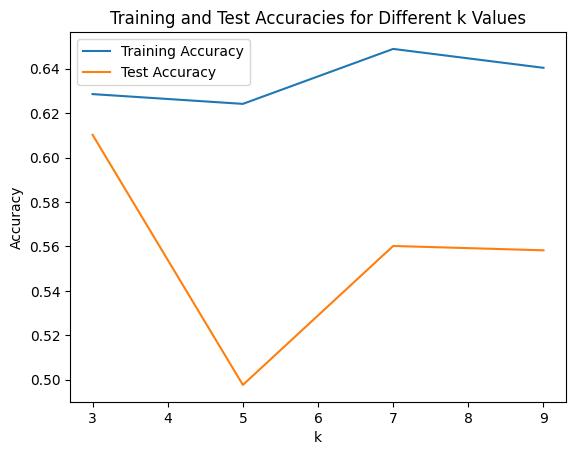

The model is overfitting.


In [111]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of k values
k_values = [3, 5, 7, 9]

# Initialize lists to store the training and testing accuracies
train_accuracies = []
test_accuracies = []

for k in k_values:
    # Create and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Calculate the accuracy on the training set
    train_accuracy = accuracy_score(y_train, knn_model.predict(X_train))
    train_accuracies.append(train_accuracy)

    # Calculate the accuracy on the test set
    test_accuracy = accuracy_score(y_test, knn_model.predict(X_test))
    test_accuracies.append(test_accuracy)

    # Print the k value and the accuracies
    print("k =", k)
    print("Training Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("-------------------")

# Plot the training and testing accuracies
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies for Different k Values')
plt.legend()
plt.show()

# Check if the model is overfitting
if max(train_accuracies) > max(test_accuracies):
    print("The model is overfitting.")
else:
    print("The model is not overfitting.")
